# Using netMHC predictions

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import sklearn.decomposition
import sklearn.manifold
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from lib import *

In [3]:
df = pd.read_csv('/home/amayer/data/proteomes/uniprot-homosapiens-up000005640-netmhc-A0201.csv', sep='\t', skiprows=1)
df.head()

,Pos,Peptide,ID,nM,Rank,Core,H_Avg_Ranks,N_binders
0,0,MTGYTPDEK,sp_O95139_NDUB6,35643.6,65.0,MTGYTPDEK,65.0,0
1,1,TGYTPDEKL,sp_O95139_NDUB6,34049.8,60.0,TGYTPDEKL,60.0,0
2,2,GYTPDEKLR,sp_O95139_NDUB6,43943.7,99.0,GYTPDEKLR,99.0,0
3,3,YTPDEKLRL,sp_O95139_NDUB6,3064.7,7.5,YTPDEKLRL,7.5,0
4,4,TPDEKLRLQ,sp_O95139_NDUB6,36799.6,70.0,TPDEKLRLQ,70.0,0


In [4]:
# 50nM = strong binding
# 500nM = weak binding
dfbinders = df[df['nM']<50]

In [5]:
dfbinders

,Pos,Peptide,ID,nM,Rank,Core,H_Avg_Ranks,N_binders
278,108,SLPEFQESV,sp_Q8N4C6_NIN_H,13.5,0.175,SLPEFQESV,0.175,1
392,222,MLEEVFHNL,sp_Q8N4C6_NIN_H,32.7,0.500,MLEEVFHNL,0.500,1
540,370,HLLERVDQV,sp_Q8N4C6_NIN_H,35.8,0.500,HLLERVDQV,0.500,1
1101,931,LLSDQILEL,sp_Q8N4C6_NIN_H,8.0,0.080,LLSDQILEL,0.080,1
1405,1235,KMLERIPEA,sp_Q8N4C6_NIN_H,6.5,0.060,KMLERIPEA,0.060,1
1538,1368,TLEECVPRV,sp_Q8N4C6_NIN_H,23.1,0.300,TLEECVPRV,0.300,1
2121,1951,KLDEQLMEM,sp_Q8N4C6_NIN_H,12.5,0.150,KLDEQLMEM,0.150,1
2204,2034,VMEERMIEV,sp_Q8N4C6_NIN_H,24.4,0.400,VMEERMIEV,0.400,1
2386,134,RLYEVVETL,sp_Q8IY84_NIM1_,23.1,0.300,RLYEVVETL,0.300,1
2502,250,YVDIWALGV,sp_Q8IY84_NIM1_,48.4,0.600,YVDIWALGV,0.600,1


In [6]:
df = counter_to_df(count_kmers_proteome(human, 1), norm=True)
df = df.set_index('seq')
humanaaprobdict = np.log10(df['freq']).to_dict()

df1 = counter_to_df(count_kmers_proteome(human, 2), norm=False)
strcolumn_to_charcolumns(df1, 'seq')
count = df1.pivot(columns='aa1', index='aa2')['count']
count /= np.sum(count, axis=0)
count[count.isna()] = 1e-10
humandoubletprobdict = np.log10(count).to_dict()

df2 = counter_to_df(count_kmers_proteome(human, 3), norm=False)
df2['aa12'] = [s[:2] for s in df2['seq']]
df2['aa3'] = [s[2] for s in df2['seq']]
count = df2.pivot(columns='aa12', index='aa3')['count']
count /= np.sum(count, axis=0)
count[count.isna()] = 1e-10
humantripletprobdict = np.log10(count).to_dict()

Malaria
1261
11207814 167749 74 113385


ValueError: range parameter must be finite.

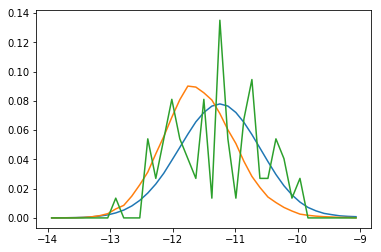

In [7]:
dfproteomes = pd.read_csv('../data/proteomes.csv', sep=',')
pathogenproteomes = dfproteomes[dfproteomes['type'].isin(['parasite'])]

dfepitopes = pd.read_csv(datadir+'allhuman-iedb-epitopes.csv', header=1, usecols=(2, 9, 14))
dfepitopes = dfepitopes.fillna('')
dfepitopes['length'] = [len(d) for d in dfepitopes['Description']]

loglikelihood = lambda seq, k: loglikelihood_triplet(seq, humanaaprobdict, humandoubletprobdict, humantripletprobdict, k=k)
likelihoodname = 'triplet'

#for k in [9, 15]:
for k in [9]:
    phuman = np.array([loglikelihood(seq[i:i+k], k) for h, seq in fasta_iter(human) for i in range(len(seq)-k+1) ])

    for idx, row in pathogenproteomes.iterrows():
        name = row['shortname']
        iedbname = row['iedbname']
        path = datadir + row['path']
        print(name)

        dfepitope = dfepitopes[dfepitopes['Parent Organism'].str.contains(iedbname)]
        print(len(dfepitope))

        epi = list(dfepitope[dfepitope['length']==k]['Description'])
        #pepitope = np.array([loglikelihood(seq, k) for seq in epi])
        #epi = list(dfepitope['Description'])
        pepitope = np.array([loglikelihood(seq[i:i+k], k) for seq in epi for i in range(len(seq)-k+1)])
        pepitope = pepitope[~np.isnan(pepitope)]
        
        ppredepitope = np.array([loglikelihood(seq, k) for seq in dfbinders['Peptide']])

        ppathogen = np.array([loglikelihood(seq[i:i+k], k) for h, seq in fasta_iter(path) for i in range(len(seq)-k+1) ])
        ppathogen = ppathogen[~np.isnan(ppathogen)]

        print(len(phuman), len(ppathogen), len(pepitope), len(ppredepitope))

        if len(pepitope) > 2:
            fig, ax = plt.subplots()
            plot_histograms([phuman, ppathogen, pepitope, ppredepitope], ['human', 'pathogen', 'epitope', 'mhc binding'], xmin=-14, xmax=-9, ax=ax)
            ax.set_ylabel('frequency')
            ax.set_xlabel('probability given human proteome statistics')
            plt.title(name)
            fig.tight_layout()
            #fig.savefig('plots/likelihoodprofile-%s-%s-k%i.png' % (name, likelihoodname, k), dpi=300)

In [9]:
len(ppredepitope)

113385